In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
from glob import glob

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
Image_Gen=ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rescale=1/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest'
                            )

In [4]:
Image_Gen.flow_from_directory('Images/Training_Set')

Found 140 images belonging to 2 classes.


In [5]:
Image_Gen.flow_from_directory('Images/Test_Set')

Found 60 images belonging to 2 classes.


In [6]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [7]:
Model=Sequential()

Model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))


Model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(224,224,3),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))

Model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(224,224,3),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))

Model.add(Flatten())

Model.add(Dense(128,activation='relu'))
Model.add(Dropout(0.5))

Model.add(Dense(1,activation='sigmoid'))

Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
Early_Stopping=EarlyStopping(monitor='val_loss',patience=2)

In [11]:
Train_Image_Gen=Image_Gen.flow_from_directory('Images/Training_Set',
                                              target_size=(224,224),
                                              batch_size=4,
                                              class_mode='binary'
                                             )

Found 140 images belonging to 2 classes.


In [12]:
Test_Image_Gen=Image_Gen.flow_from_directory('Images/Test_Set',
                                              target_size=(224,224),
                                              batch_size=4,
                                              class_mode='binary',
                                             )

Found 60 images belonging to 2 classes.


In [13]:
Train_Image_Gen.class_indices

{'Biswa': 0, 'Satyam': 1}

In [14]:
Test_Image_Gen.class_indices

{'Biswa': 0, 'Satyam': 1}

In [15]:
Model.fit_generator(Train_Image_Gen,validation_data=Test_Image_Gen,epochs=5,callbacks=[Early_Stopping])

Epoch 1/5
35/35 [==============================] - 22s 627ms/step - loss: 0.8269 - accuracy: 0.5429 - val_loss: 0.5733 - val_accuracy: 0.9500
Epoch 2/5
35/35 [==============================] - 21s 613ms/step - loss: 0.5247 - accuracy: 0.7643 - val_loss: 0.2276 - val_accuracy: 0.9667
Epoch 3/5
35/35 [==============================] - 21s 613ms/step - loss: 0.1843 - accuracy: 0.9429 - val_loss: 0.0851 - val_accuracy: 1.0000
Epoch 4/5
35/35 [==============================] - 21s 612ms/step - loss: 0.0538 - accuracy: 0.9929 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 5/5
35/35 [==============================] - 21s 610ms/step - loss: 0.1168 - accuracy: 0.9714 - val_loss: 0.0832 - val_accuracy: 1.0000


In [16]:
Model.history.history

{'loss': [0.8268508442810604,
  0.5246784303869519,
  0.1843037220516375,
  0.05377588701064399,
  0.11678008246640924],
 'accuracy': [0.54285717, 0.76428574, 0.94285715, 0.99285716, 0.9714286],
 'val_loss': [0.5733304023742676,
  0.22760242422421773,
  0.08506783549043272,
  0.0017356728853580232,
  0.08317270030577978],
 'val_accuracy': [0.95, 0.96666664, 1.0, 1.0, 1.0]}

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
Metrics=pd.DataFrame(Model.history.history)

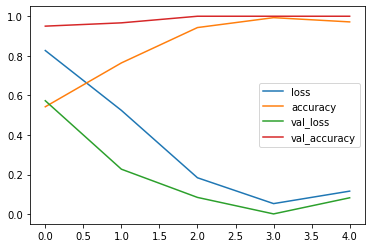

In [18]:
Metrics.plot()

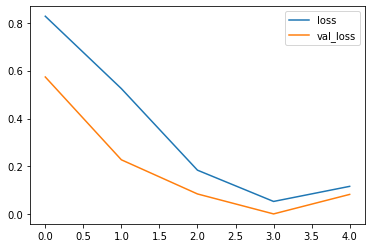

In [19]:
Metrics[['loss','val_loss']].plot()

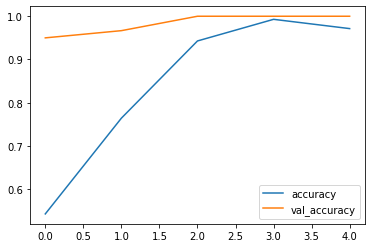

In [20]:
Metrics[['accuracy','val_accuracy']].plot()

In [21]:
from tensorflow.keras.preprocessing import image

In [22]:
Biswa='Images/Training_Set/Biswa/31.jpg'

In [31]:
Biswa_Image=image.load_img(Biswa,target_size=(224,224))
Biswa_Image=image.img_to_array(Biswa_Image)
Biswa_Image=np.expand_dims(Biswa_Image,axis=0)

In [32]:
Biswa_Image=Biswa_Image/255

In [33]:
Model.predict(Biswa_Image)

array([[0.1002709]], dtype=float32)

In [34]:
Model.predict_classes(Biswa_Image)

array([[0]])

In [35]:
from tensorflow.keras.models import load_model

In [36]:
Model.save('Face_Recognition.h5')